In [1]:
# Importing Packages and Libraries
import shap
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OneHotEncoder

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


In [2]:
# Load data
file_path1 = '/Users/paulahofmann/Documents/Coding/Online-Review/FeaturePreperation/Data_with_Features/Final Data/Utilitarian_Final.csv'
df = pd.read_csv(file_path1)



# 1. Preperation of Features

In [3]:
# Drop unnecessary columns
columns_to_drop = ['title_x', 'text', 'images', 'asin', 'parent_asin', 'user_id',
       'timestamp', 'verified_purchase', 'text_cleaned',
       'text_cleaned1','main_category','features','neutral_score','day_of_week',]
df.drop(columns=columns_to_drop, inplace=True)

In [4]:
# Mapping dictionary for sentiment transformation
sentiment_mapping = {'positive': 2, 'neutral': 1, 'negative': 0}

# Using map function to create a new column 'sentiment_c' with transformed values
df['sentiment_c'] = df['Sentiment_Classification'].map(sentiment_mapping)

In [5]:
# Create a new column 'helpful' based on the condition
df['helpful'] = (df['helpful_vote'] > 0).astype(int)


In [6]:
# Define features and target variable
features = ['rating', 'sentiment_c','word_count', 'sent_count', 'sent_length', 'title_length', 'elap_days',
       'image', 'ver_purch','FRE','#nouns','#adj', '#adv', 'subjective_score','product']
target = 'helpful'

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, classification_report
import statsmodels.api as sm


# Define numerical features and the target
numerical_features = ['rating', 'sentiment_c', 'word_count', 'sent_count', 'sent_length', 'title_length', 'elap_days', 'image', 'ver_purch', 'FRE', '#nouns', '#adj', '#adv', 'subjective_score']
target = 'helpful'

# Concatenate numerical features and dummy variables
#X = pd.concat([df[numerical_features], product_dummies], axis=1)
X = df [numerical_features]
y = df[target]



### 2. Logistic Regression for evaluating features importance 

In [8]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.375182
         Iterations 7
                         Results: Logit
Model:              Logit            Method:           MLE       
Dependent Variable: helpful          Pseudo R-squared: 0.148     
Date:               2024-06-14 09:33 AIC:              13760.4098
No. Observations:   18301            BIC:              13869.8158
Df Model:           13               Log-Likelihood:   -6866.2   
Df Residuals:       18287            LL-Null:          -8062.7   
Converged:          1.0000           LLR p-value:      0.0000    
No. Iterations:     7.0000           Scale:            1.0000    
-----------------------------------------------------------------
                  Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-----------------------------------------------------------------
rating           -0.3745   0.0181 -20.6535 0.0000 -0.4101 -0.3390
sentiment_c      -0.1339   0.0354  -3.7804 0.0002 -0.2033 -0.0645


In [9]:
# Deleting Sentiment Classification due not significant
numerical_features = ['rating', 'word_count', 'sent_count', 'sent_length', 'title_length', 'elap_days', 'image', 'ver_purch', 'FRE', '#nouns', '#adj', '#adv', 'subjective_score']
target = 'helpful'

# Concatenate numerical features and dummy variables
#X = pd.concat([df[numerical_features], product_dummies], axis=1)
X = df [numerical_features]
y = df[target]

import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.375569
         Iterations 7
                         Results: Logit
Model:              Logit            Method:           MLE       
Dependent Variable: helpful          Pseudo R-squared: 0.148     
Date:               2024-06-14 09:33 AIC:              13772.5810
No. Observations:   18301            BIC:              13874.1723
Df Model:           12               Log-Likelihood:   -6873.3   
Df Residuals:       18288            LL-Null:          -8062.7   
Converged:          1.0000           LLR p-value:      0.0000    
No. Iterations:     7.0000           Scale:            1.0000    
-----------------------------------------------------------------
                  Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-----------------------------------------------------------------
rating           -0.4222   0.0132 -32.0684 0.0000 -0.4481 -0.3964
word_count        0.0006   0.0010   0.5655 0.5717 -0.0014  0.0025


In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

# Split data for test and training data
X_train, X_test, y_train, y_test = train_test_split(
    df[numerical_features],  
    df[target], 
    test_size=0.2,  
    random_state=42  # Set a random seed for reproducibility
)

In [11]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

pd.DataFrame(X_train, columns=X.columns)


,rating,word_count,sent_count,sent_length,title_length,elap_days,image,ver_purch,FRE,#nouns,#adj,#adv,subjective_score
0,0.723014,-0.322662,-0.656667,0.828060,2.480443,-0.086487,-0.15787,0.220023,0.754816,0.128826,0.383453,-0.333063,0.999845
1,0.723014,0.625937,0.888308,0.133412,-0.237647,0.162922,-0.15787,0.220023,-0.038292,-0.402673,-0.286486,-0.256762,0.543649
2,0.723014,-0.184324,-0.270424,0.104468,-0.237647,2.538136,-0.15787,0.220023,0.577403,-0.029208,-0.033260,0.344186,-1.822625
3,-1.187278,0.052825,-0.270424,0.876300,-0.237647,0.109311,-0.15787,0.220023,-0.149737,0.128826,-0.906373,-0.901078,-1.785938
4,-1.824042,-0.144799,-0.270424,0.152708,-0.237647,-1.099275,-0.15787,0.220023,0.526928,1.090830,-0.464147,-0.901078,0.949351
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14635,0.723014,-0.421474,-0.656667,0.152708,3.159966,-0.962916,-0.15787,0.220023,0.949719,0.781032,-1.164338,-0.901078,-0.392641
14636,-1.824042,-0.125037,-0.270424,0.249187,-0.237647,0.180404,-0.15787,0.220023,-0.344141,0.695571,-0.488291,-0.901078,0.624022
14637,0.723014,-0.520286,-0.270424,-0.715603,-0.237647,1.013710,-0.15787,0.220023,1.008690,-1.697350,1.014035,0.298065,0.861356
14638,0.723014,-0.204087,0.502064,-0.546765,-0.237647,-1.158713,-0.15787,0.220023,-0.029796,0.037517,0.011983,0.393997,-0.597473


In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, classification_report

# Initialize the logistic regression model
logreg_model = LogisticRegression(solver='lbfgs', max_iter=1000)  # You can adjust max_iter as needed

# Train the model
logreg_model.fit(X_train, y_train)

# Predict on the testing set
y_pred = logreg_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate F1 score
f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)

# Calculate AUC
auc = roc_auc_score(y_test, y_pred)
print("AUC:", auc)

# Generate classification report
print(classification_report(y_test, y_pred))

from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

Accuracy: 0.8497678229991805
F1 Score: 0.19117647058823528
AUC: 0.5494471884932886
              precision    recall  f1-score   support

           0       0.86      0.98      0.92      3096
           1       0.57      0.12      0.19       565

    accuracy                           0.85      3661
   macro avg       0.71      0.55      0.55      3661
weighted avg       0.81      0.85      0.81      3661

[[3046   50]
 [ 500   65]]


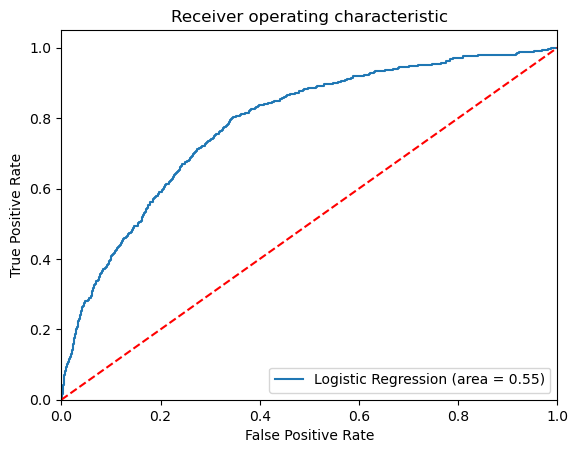

In [13]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, logreg_model.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg_model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [14]:
import statsmodels.api as sm
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, classification_report

# Adding a constant to the model (intercept term)
X_train_const = sm.add_constant(X_train)
X_test_const = sm.add_constant(X_test)

# Initialize the logistic regression model
logit_model = sm.Logit(y_train, X_train_const)

# Train the model
result = logit_model.fit()

# Print the summary of the model
print(result.summary())

# Get p-values of coefficients
p_values = result.pvalues

# Significant coefficients (assuming alpha = 0.05)
significant_coefs = p_values[p_values < 0.05]
print("Significant coefficients:")
print(significant_coefs)

# Predict on the testing set
y_pred_prob = result.predict(X_test_const)
y_pred = (y_pred_prob >= 0.5).astype(int)  # Convert probabilities to binary outcomes

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate F1 score
f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)

# Calculate AUC
auc = roc_auc_score(y_test, y_pred_prob)
print("AUC:", auc)

# Generate classification report
print(classification_report(y_test, y_pred))


Optimization terminated successfully.
         Current function value: 0.376469
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                helpful   No. Observations:                14640
Model:                          Logit   Df Residuals:                    14626
Method:                           MLE   Df Model:                           13
Date:                Fri, 14 Jun 2024   Pseudo R-squ.:                  0.1504
Time:                        09:33:30   Log-Likelihood:                -5511.5
converged:                       True   LL-Null:                       -6487.3
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.9397      0.028    -69.217      0.000      -1.995      -1.885
x1            -0.6320      0.